# Projek Akhir Tim Oil Bot 

## __1. Introduction__

### __1.1 Mengimport Library__

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")


### __1.2 Mengimport Dataset__

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/beatrixyy/Projek-Akhir-SI/main/Clean_time_zone_perhari.csv")
df.head(10)

,Tanggal,mean_wib,mean_wita,mean_wit
0,2020-01-01,12817.0,14021.0,15012.0
1,2020-01-02,12817.0,14021.0,15012.0
2,2020-01-03,12836.0,14033.0,15012.0
3,2020-01-04,12836.0,14033.0,15012.0
4,2020-01-05,12836.0,14033.0,15012.0
5,2020-01-06,12925.0,14075.0,15062.0
6,2020-01-07,12975.0,14108.0,15062.0
7,2020-01-08,12961.0,14108.0,15062.0
8,2020-01-09,12978.0,14117.0,15075.0
9,2020-01-10,12997.0,14112.0,15062.0


### __1.3 Melihat informasi dari dataframe__

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tanggal    857 non-null    object 
 1   mean_wib   857 non-null    float64
 2   mean_wita  857 non-null    float64
 3   mean_wit   857 non-null    float64
dtypes: float64(3), object(1)
memory usage: 26.9+ KB


### __1.4 Mengkonversi tipe data yang dibutuhkan__

Dikarenakan tipe data 'Tanggal' masih dalam bentuk object(string) maka kita ubah menjadi menjadi datetime64

In [ ]:
# merubah tipe data object to datetime
df['Tanggal'] = df['Tanggal'].astype('datetime64')

# melihat tipe data dataframe
print(df.dtypes)

Tanggal      datetime64[ns]
mean_wib            float64
mean_wita           float64
mean_wit            float64
dtype: object


### __1.5 Split Dataframe WIB, WITA, WIT__

#### __1.5.1 Dataframe WIB__

In [ ]:
df_wib = df.filter(items=['Tanggal', 'mean_wib'])
df_wib


,Tanggal,mean_wib
0,2020-01-01,12817.0
1,2020-01-02,12817.0
2,2020-01-03,12836.0
3,2020-01-04,12836.0
4,2020-01-05,12836.0
...,...,...
852,2022-05-02,22594.0
853,2022-05-03,22594.0
854,2022-05-04,22594.0
855,2022-05-05,22594.0


#### __1.5.2 Dataframe WITA__

In [ ]:
df_wita = df.filter(items=['Tanggal', 'mean_wita'])
df_wita


,Tanggal,mean_wita
0,2020-01-01,14021.0
1,2020-01-02,14021.0
2,2020-01-03,14033.0
3,2020-01-04,14033.0
4,2020-01-05,14033.0
...,...,...
852,2022-05-02,26100.0
853,2022-05-03,26100.0
854,2022-05-04,26100.0
855,2022-05-05,26100.0


#### __1.5.3 Dataframe WIT__

In [ ]:
df_wit = df.filter(items=['Tanggal', 'mean_wit'])
df_wit


,Tanggal,mean_wit
0,2020-01-01,15012.0
1,2020-01-02,15012.0
2,2020-01-03,15012.0
3,2020-01-04,15012.0
4,2020-01-05,15012.0
...,...,...
852,2022-05-02,29275.0
853,2022-05-03,29275.0
854,2022-05-04,29275.0
855,2022-05-05,28062.0


## __2. Plot Data__

### __2.1 Visualisasi Dataset__

#### __2.1.1 Rata-rata Harga Minyak Goreng Waktu Indonesia Barat, Tengah, Timur per Hari__

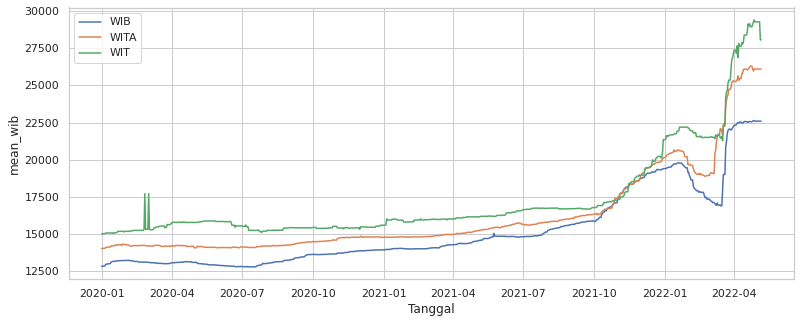

In [ ]:
plt.figure(figsize=(13,5))
sns.lineplot(data=df, x='Tanggal', y='mean_wib', legend= 'brief')
sns.lineplot(data=df, x='Tanggal', y='mean_wita', legend= 'brief')
sns.lineplot(data=df, x='Tanggal', y='mean_wit', legend= 'brief')
plt.legend(labels=['WIB', 'WITA', 'WIT'])

### __2.2 Statistika Deskriptif__

Melihat Statistika Deskriptif dari Dataset sebelum melakukan pembuatan model, sebaiknya dilakukan analisa terhadap statistika deskriptif dari data.

#### __2.2.1 Statistika Deskriptif zona WIB__

In [ ]:
df_wib.describe()

,mean_wib
count,857.000000
mean,15184.912485
std,2597.290549
min,12778.000000
25%,13172.000000
50%,14061.000000
75%,15936.000000
max,22633.000000


#### __2.2.2 Statistika Deskriptif zona WITA__

In [ ]:
df_wita.describe()

,mean_wita
count,857.000000
mean,16214.390898
std,2964.461286
min,14021.000000
25%,14229.000000
50%,14842.000000
75%,16333.000000
max,26292.000000


#### __2.2.3 Statistika Deskriptif zona WIT__

In [ ]:
df_wit.describe()


,mean_wit
count,857.000000
mean,17290.480747
std,3172.616809
min,15012.000000
25%,15450.000000
50%,15988.000000
75%,16912.000000
max,29412.000000


## __3. Preprocessing__

### __3.1 Split Data__

Split data dilakukan agar model yang telah dilatih dapat dievaluasi kemampuannya.
Karena data yang digunakan adalah data time series, maka split data tidak dilakukan secara acak
Kita juga akan melakukan cross validation menggunakan data train sehingga pastikan data train yang digunakan cukup besar.
Digunakan data 70% sebagai data train dan 30% untuk data test

#### __3.1.1 Split Data WIB__

In [ ]:
# split data
train_size_wib = int(len(df_wib) * 0.75) # Menentukan banyaknya data train yaitu sebesar 70% data
train_wib = df_wib[:train_size_wib]
test_wib =df_wib[train_size_wib:].reset_index(drop=True)

#### __3.1.2 Split Data WITA__

In [ ]:
# split data
train_size_wita = int(len(df_wita) * 0.75) # Menentukan banyaknya data train yaitu sebesar 75% data
train_wita = df_wita[:train_size_wita]
test_wita =df_wita[train_size_wita:].reset_index(drop=True)

#### __3.1.3 Split Data WIT__

In [ ]:
# split data
train_size_wit = int(len(df_wit) * 0.75) # Menentukan banyaknya data train yaitu sebesar 75% data
train_wit = df_wit[:train_size_wit]
test_wit =df_wit[train_size_wit:].reset_index(drop=True)

### __3.2 Feature Scaling__

Feature Scalling Menggunakan MinMaxScaler.

MinMaxScaler difit pada data train disetiap zona waktu agar dapat digunakan kembali pada data test maupun data observasi baru.
Hasil scalling disimpan pada kolom baru yaitu 'scaled'


#### __3.2.1 Feature Scalling zona WIB__

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_wib = MinMaxScaler()
scaler_wib.fit(train_wib[['mean_wib']])

train_wib['scaled_wib'] = scaler_wib.transform(train_wib[['mean_wib']])
test_wib['scaled_wib'] = scaler_wib.transform(test_wib[['mean_wib']])

Melihat 10 data train zona wib yang telah di scalling

In [ ]:
train_wib.head(10)

,Tanggal,mean_wib,scaled_wib
0,2020-01-01,12817.0,0.012568
1,2020-01-02,12817.0,0.012568
2,2020-01-03,12836.0,0.018692
3,2020-01-04,12836.0,0.018692
4,2020-01-05,12836.0,0.018692
5,2020-01-06,12925.0,0.047374
6,2020-01-07,12975.0,0.063487
7,2020-01-08,12961.0,0.058975
8,2020-01-09,12978.0,0.064454
9,2020-01-10,12997.0,0.070577


#### __3.2.2 Feature Scalling zona WITA__

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_wita = MinMaxScaler()
scaler_wita.fit(train_wita[['mean_wita']])

train_wita['scaled_wita'] = scaler_wita.transform(train_wita[['mean_wita']])
test_wita['scaled_wita'] = scaler_wita.transform(test_wita[['mean_wita']])

Melihat 10 data train zona wita yang telah di scalling

In [ ]:
train_wita.head(10)

,Tanggal,mean_wita,scaled_wita
0,2020-01-01,14021.0,0.000000
1,2020-01-02,14021.0,0.000000
2,2020-01-03,14033.0,0.005190
3,2020-01-04,14033.0,0.005190
4,2020-01-05,14033.0,0.005190
5,2020-01-06,14075.0,0.023356
6,2020-01-07,14108.0,0.037630
7,2020-01-08,14108.0,0.037630
8,2020-01-09,14117.0,0.041522
9,2020-01-10,14112.0,0.039360


#### __3.2.3 Feature Scalling zona WIT__

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_wit = MinMaxScaler()
scaler_wit.fit(train_wit[['mean_wit']])

train_wit['scaled_wit'] = scaler_wit.transform(train_wit[['mean_wit']])
test_wit['scaled_wit'] = scaler_wit.transform(test_wit[['mean_wit']])

In [ ]:
train_wit.head(10)

,Tanggal,mean_wit,scaled_wit
0,2020-01-01,15012.0,0.000000
1,2020-01-02,15012.0,0.000000
2,2020-01-03,15012.0,0.000000
3,2020-01-04,15012.0,0.000000
4,2020-01-05,15012.0,0.000000
5,2020-01-06,15062.0,0.018519
6,2020-01-07,15062.0,0.018519
7,2020-01-08,15062.0,0.018519
8,2020-01-09,15075.0,0.023333
9,2020-01-10,15062.0,0.018519


### __3.3 Sliding Window__

Membuat fungsi sliding window

Selanjutnya kita akan membuat fungsi sliding window dengan input data (bertipe data numpy array) dan window size
Fungsi ini akan menghasilkan variabel input (X) dan variabel target (y)

In [ ]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data)-window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    X = np.stack(sub_seq)
    y = np.array(next_values)
    return X,y


Berapa window size yang tepat untuk digunakan?
Pada penerapannya kita dapat menentukan window size berapa saja.
Untuk mencapai hasil yang maksimal dapat dilakukan percobaan dengan menggunakan beberapa window size.
Perlu diperhatikan juga bahwa semakin** besar window size **yang digunakan akan memerlukan waktu yang cukup lama dalam proses training data
Pada contoh ini kita hanya menggunakan window size = 24 atau sama dengan 1 hari dan kita terapkan pada data train dan test yang telah discalling

#### __3.3.1 Sliding Window zona WIB__

In [ ]:
window_size = 30

X_train_wib, y_train_wib = sliding_window(train_wib[['scaled_wib']].values, window_size)
X_test_wib, y_test_wib = sliding_window(test_wib[['scaled_wib']].values, window_size)



In [ ]:
print(X_train_wib.shape, y_train_wib.shape)
print(X_test_wib.shape, y_test_wib.shape)

(612, 30, 1) (612, 1)
(185, 30, 1) (185, 1)


#### __3.3.2 Sliding Window zona WITA__

In [ ]:
window_size = 30

X_train_wita, y_train_wita = sliding_window(train_wita[['scaled_wita']].values, window_size)
X_test_wita, y_test_wita = sliding_window(test_wita[['scaled_wita']].values, window_size)


In [ ]:
print(X_train_wita.shape, y_train_wita.shape)
print(X_test_wita.shape, y_test_wita.shape)

(612, 30, 1) (612, 1)
(185, 30, 1) (185, 1)


#### __3.3.3 Sliding Window zona WIT__

In [ ]:
window_size = 30

X_train_wit, y_train_wit = sliding_window(train_wit[['scaled_wit']].values, window_size)
X_test_wit, y_test_wit = sliding_window(test_wit[['scaled_wit']].values, window_size)


In [ ]:
print(X_train_wit.shape, y_train_wit.shape)
print(X_test_wit.shape, y_test_wit.shape)

(612, 30, 1) (612, 1)
(185, 30, 1) (185, 1)


## __4. Pembuatan Model__

### __4.1 Import Modul__

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM #, RNN, GRU 

### __4.2 Membuat fungsi model LSTM__

Fungsi model yang akan dibuat terdiri:

LSTM layer dengan 
* input_shape = (window_size, 1)
* Dense layer dengan 32 neuron dengan fungsi aktivasi ReLu
* Dropout antara Dense layer dan Dense output layer
* Dense output layer dengan 1 neuron
* loss function yang digunakan adalah Mean Squared Error (MSE)
* optimizer yang digunakan adalah adam
* metric yang digunakan adalah Mean Absolute Error (MAE)

* Parameter-parameter yang dijadikan sebagai input dari fungsi tersebut adalah:
  - LSTM_unit: banyaknya LSTM unit (default = 64)
  - dropout: persentase dropout (default = 0.2)

In [ ]:
def create_model(LSTM_unit=64, dropout=0.2): #jika ingin menggunakan RNN atau GRU ganti LSTM dengan GRU/RNN
    # create model
    model = Sequential()
    model.add(LSTM(units=LSTM_unit, input_shape=(window_size, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

### __4.3 Membuat Model__

Kita coba lakukan hypertuning pada parameter, dengan mencoba kombinasi nilai LSTM unitnya 16,32,64,28 dan peluang dropout 0,1 dan 0,2

In [ ]:
LSTM_unit = [16,32,64,128]
dropout = [0.1,0.2]


Dilakukan early stopping pada saat proses training

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=100, validation_split=0.1, batch_size=16, verbose=1) # callbacks=[es]

# define the grid search parameters
LSTM_unit = [16,32,64,128]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

### __4.4 Training model zona WIB__

#### __4.4.1 Membuat variabel GridSearch__

Variabel GridSearchCV dibuat dengan memasukan beberapa parameter yaitu:
- estimator: model yang ingin dilakukan gridsearch
- param_grid: parameter yang ingin diuji
- n_jobs: Jumlah pekerjaan untuk dijalankan secara paralel. (-1 artinya menggunakan seluruh core processor)
- cv: banyaknya k-fold cross validation

In [ ]:
grid_wib = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

#### __4.4.2 GridSearchCV Model__

In [ ]:
grid_result_wib = grid_wib.fit(X_train_wib, y_train_wib)

Epoch 1/100
35/35 [==============================] - 3s 29ms/step - loss: 0.0264 - mae: 0.1165 - val_loss: 0.0148 - val_mae: 0.1216
Epoch 2/100
35/35 [==============================] - 1s 14ms/step - loss: 0.0040 - mae: 0.0472 - val_loss: 0.0012 - val_mae: 0.0326
Epoch 3/100
35/35 [==============================] - 1s 14ms/step - loss: 0.0026 - mae: 0.0331 - val_loss: 0.0047 - val_mae: 0.0679
Epoch 4/100
35/35 [==============================] - 1s 14ms/step - loss: 0.0018 - mae: 0.0302 - val_loss: 0.0019 - val_mae: 0.0426
Epoch 5/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0021 - mae: 0.0329 - val_loss: 0.0022 - val_mae: 0.0463
Epoch 6/100
35/35 [==============================] - 0s 14ms/step - loss: 0.0018 - mae: 0.0299 - val_loss: 0.0077 - val_mae: 0.0872
Epoch 7/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0021 - mae: 0.0316 - val_loss: 0.0010 - val_mae: 0.0304
Epoch 8/100
35/35 [==============================] - 0s 14ms/step - loss: 0.

#### __4.4.3 Hasil Parameter Terbaik__

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result_wib.best_score_, grid_result_wib.best_params_))
means_wib = grid_result_wib.cv_results_['mean_test_score']
stds_wib = grid_result_wib.cv_results_['std_test_score']
params_wib = grid_result_wib.cv_results_['params']
for mean, stdev, param in zip(means_wib, stds_wib, params_wib):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mengambil model terbaik
best_model_wib = grid_result_wib.best_estimator_.model

Best: -0.000090 using {'LSTM_unit': 64, 'dropout': 0.1}
-0.000575 (0.000857) with: {'LSTM_unit': 16, 'dropout': 0.1}
-0.000233 (0.000101) with: {'LSTM_unit': 16, 'dropout': 0.2}
-0.000213 (0.000139) with: {'LSTM_unit': 32, 'dropout': 0.1}
-0.000675 (0.000829) with: {'LSTM_unit': 32, 'dropout': 0.2}
-0.000090 (0.000038) with: {'LSTM_unit': 64, 'dropout': 0.1}
-0.000161 (0.000081) with: {'LSTM_unit': 64, 'dropout': 0.2}
-0.000423 (0.000333) with: {'LSTM_unit': 128, 'dropout': 0.1}
-0.000217 (0.000167) with: {'LSTM_unit': 128, 'dropout': 0.2}


In [ ]:
from tensorflow.keras.models import load_model
best_model_wib.save('my_model_wib')

NameError: ignored

In [ ]:
import shutil

shutil.make_archive('my_modelku_wib', 'zip', root_dir='/content/my_model_wib')



'/content/my_modelku_wib.zip'

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
import shutil

shutil.unpack_archive('my_modelku_wita.zip', '/content/my_modelku_wita' , 'zip')

In [ ]:
best_model_wita = load_model('my_modelku_wita')

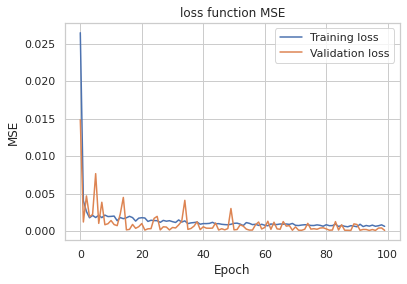

In [ ]:
history_wib= best_model_wib.history
# grafik loss function MSE

plt.plot(history_wib.history['loss'], label='Training loss')
plt.plot(history_wib.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

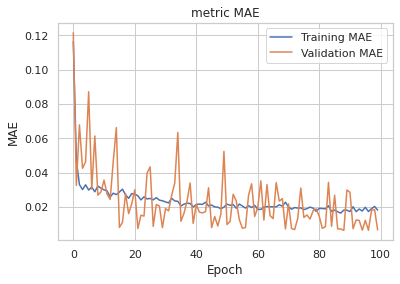

In [ ]:
# grafik metric MAE

plt.plot(history_wib.history['mae'], label='Training MAE')
plt.plot(history_wib.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

#### __4.4.4 Evaluasi Model__

In [ ]:
# Prediksi data train
predict_train_wib = scaler_wib.inverse_transform(best_model_wib.predict(X_train_wib))
true_train_wib = scaler_wib.inverse_transform(y_train_wib)

# Prediksi data test
predict_test_wib = scaler_wib.inverse_transform(best_model_wib.predict(X_test_wib))
true_test_wib = scaler_wib.inverse_transform(y_test_wib)

Plot prediksi data train

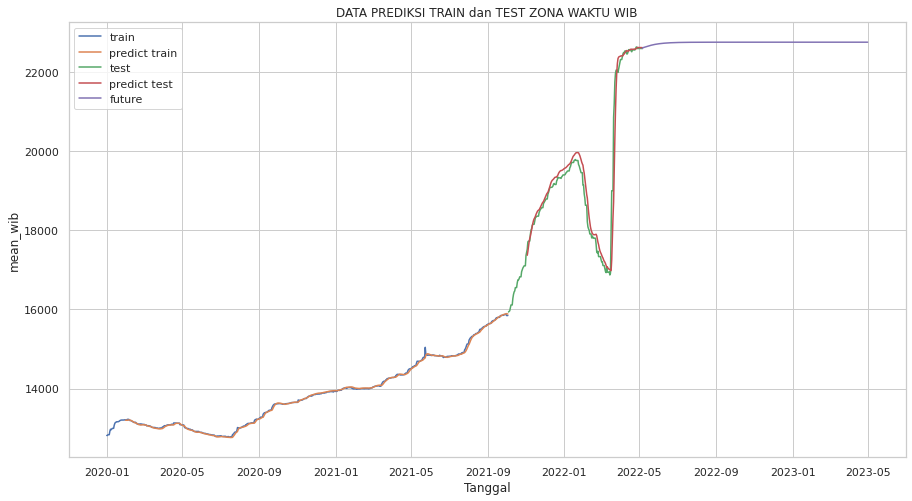

In [ ]:
train_wib['predict'] = np.nan
train_wib['predict'][-len(predict_train_wib):] = predict_train_wib[:,0]
test_wib['predict'] = np.nan
test_wib['predict'][-len(predict_test_wib):] = predict_test_wib[:,0]

y_test_wib = scaler_wib.transform(test_wib[['mean_wib']])
n_future_wib = 12*30
future_wib = [[y_test_wib[-1,0]]]
X_new_wib = y_test_wib[-window_size:,0].tolist()

for i in range(n_future_wib):
    y_future_wib = best_model_wib.predict(np.array([X_new_wib]).reshape(1,window_size,1))
    future_wib.append([y_future_wib[0,0]])
    X_new_wib = X_new_wib[1:]
    X_new_wib.append(y_future_wib[0,0])

future_wib = scaler_wib.inverse_transform(np.array(future_wib))
date_future_wib = pd.date_range(start=test_wib['Tanggal'].values[-1], periods=n_future_wib+1, freq='D')

plt.figure(figsize=(15,8))
plt.title('DATA PREDIKSI TRAIN dan TEST ZONA WAKTU WIB')
sns.lineplot(data=train_wib, x='Tanggal', y='mean_wib', label = 'train')
sns.lineplot(data=train_wib, x='Tanggal', y='predict', label = 'predict train')
sns.lineplot(data=test_wib, x='Tanggal', y='mean_wib', label = 'test')
sns.lineplot(data=test_wib, x='Tanggal', y='predict', label = 'predict test')
sns.lineplot(x=date_future_wib, y=future_wib[:,0], label = 'future')

Plot Prediksi data test

In [ ]:
test_wib

,Tanggal,mean_wib,predict
0,2021-10-04,15936.0,NaN
1,2021-10-05,15950.0,NaN
2,2021-10-06,15967.0,NaN
3,2021-10-07,16042.0,NaN
4,2021-10-08,16114.0,NaN
...,...,...,...
210,2022-05-02,22594.0,22618.898438
211,2022-05-03,22594.0,22617.996094
212,2022-05-04,22594.0,22616.988281
213,2022-05-05,22594.0,22616.003906


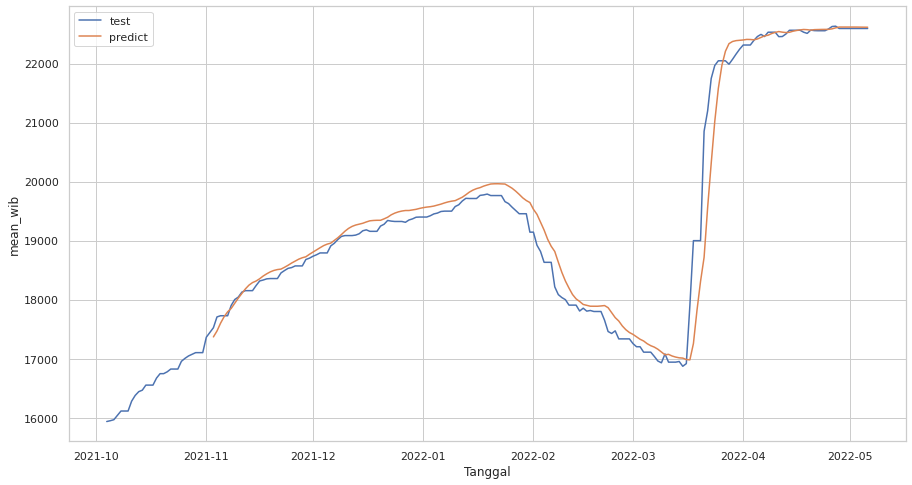

In [ ]:
test_wib['predict'] = np.nan
test_wib['predict'][-len(predict_test_wib):] = predict_test_wib[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=test_wib, x='Tanggal', y='mean_wib', label = 'test')
sns.lineplot(data=test_wib, x='Tanggal', y='predict', label = 'predict')

Plot prediksi data sebulan

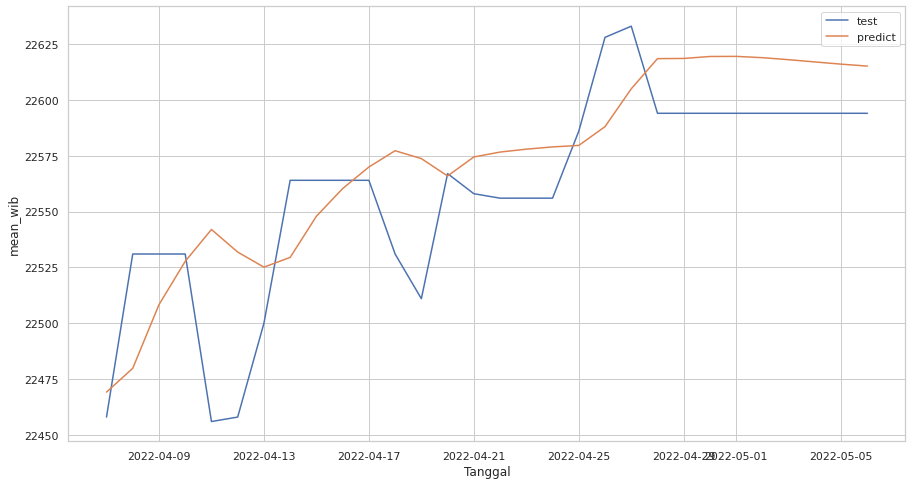

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=test_wib[-1*30:], x='Tanggal', y='mean_wib', label = 'test')
sns.lineplot(data=test_wib[-1*30:], x='Tanggal', y='predict', label = 'predict')

#### __4.4.5 Forecasting__

Text(0, 0.5, 'mean_wib')

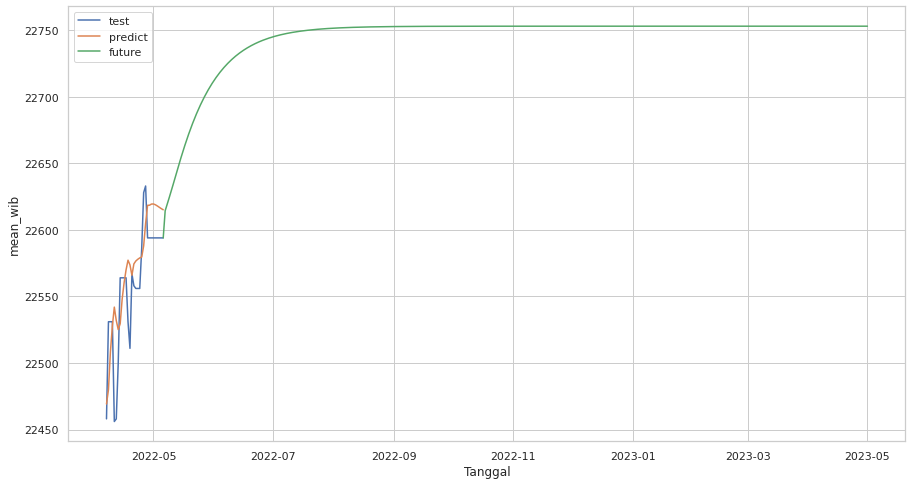

In [ ]:
# forecasting data selanjutnya
y_test_wib = scaler_wib.transform(test_wib[['mean_wib']])
n_future_wib = 12*30
future_wib = [[y_test_wib[-1,0]]]
X_new_wib = y_test_wib[-window_size:,0].tolist()

for i in range(n_future_wib):
    y_future_wib = best_model_wib.predict(np.array([X_new_wib]).reshape(1,window_size,1))
    future_wib.append([y_future_wib[0,0]])
    X_new_wib = X_new_wib[1:]
    X_new_wib.append(y_future_wib[0,0])

future_wib = scaler_wib.inverse_transform(np.array(future_wib))
date_future_wib = pd.date_range(start=test_wib['Tanggal'].values[-1], periods=n_future_wib+1, freq='D')

# Plot Data dua bulan terakhir dan dua bulan selanjutnya
plt.figure(figsize=(15,8))
sns.lineplot(data=test_wib[-1*30:], x='Tanggal', y='mean_wib', label = 'test') #[-1*30:] [-24*30:]
sns.lineplot(data=test_wib[-1*30:], x='Tanggal', y='predict', label = 'predict') #[-1*30:] [-24*30:]
sns.lineplot(x=date_future_wib, y=future_wib[:,0], label = 'future')
plt.ylabel('mean_wib')


### __4.5 Training model zona WITA__

#### __4.5.1 Membuat Variabel GridSearchCV__



In [ ]:
grid_wita = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

#### __4.5.2 GridSearchCV Model__

In [ ]:
grid_result_wita = grid_wita.fit(X_train_wita, y_train_wita)

Epoch 1/100
35/35 [==============================] - 3s 40ms/step - loss: 0.0149 - mae: 0.0785 - val_loss: 0.0112 - val_mae: 0.1050
Epoch 2/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0024 - mae: 0.0319 - val_loss: 2.2537e-04 - val_mae: 0.0122
Epoch 3/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0021 - mae: 0.0306 - val_loss: 0.0012 - val_mae: 0.0326
Epoch 4/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0021 - mae: 0.0302 - val_loss: 0.0055 - val_mae: 0.0733
Epoch 5/100
35/35 [==============================] - 1s 25ms/step - loss: 0.0017 - mae: 0.0272 - val_loss: 2.5127e-04 - val_mae: 0.0137
Epoch 6/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0015 - mae: 0.0267 - val_loss: 2.7208e-04 - val_mae: 0.0141
Epoch 7/100
35/35 [==============================] - 1s 25ms/step - loss: 0.0017 - mae: 0.0274 - val_loss: 0.0013 - val_mae: 0.0343
Epoch 8/100
35/35 [==============================] - 1s 25ms/ste

#### __4.5.3 Hasil Paramater Terbaik__

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result_wita.best_score_, grid_result_wita.best_params_))
means_wita = grid_result_wita.cv_results_['mean_test_score']
stds_wita = grid_result_wita.cv_results_['std_test_score']
params_wita = grid_result_wita.cv_results_['params']
for mean, stdev, param in zip(means_wita, stds_wita, params_wita):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mengambil model terbaik
best_model_wita = grid_result_wita.best_estimator_.model

Best: -0.000120 using {'LSTM_unit': 128, 'dropout': 0.1}
-0.000250 (0.000178) with: {'LSTM_unit': 16, 'dropout': 0.1}
-0.000752 (0.000662) with: {'LSTM_unit': 16, 'dropout': 0.2}
-0.000179 (0.000057) with: {'LSTM_unit': 32, 'dropout': 0.1}
-0.000237 (0.000135) with: {'LSTM_unit': 32, 'dropout': 0.2}
-0.000285 (0.000266) with: {'LSTM_unit': 64, 'dropout': 0.1}
-0.000373 (0.000508) with: {'LSTM_unit': 64, 'dropout': 0.2}
-0.000120 (0.000080) with: {'LSTM_unit': 128, 'dropout': 0.1}
-0.000382 (0.000387) with: {'LSTM_unit': 128, 'dropout': 0.2}


In [ ]:
from tensorflow.keras.models import load_model
best_model_wita.save('my_model_wita')

NameError: ignored

In [ ]:
import shutil

shutil.make_archive('my_modelku_wita', 'zip', root_dir='/content/my_model_wita')


FileNotFoundError: ignored

#### __4.5.4 Evaluasi Model__


In [ ]:
# Prediksi data train
predict_train_wita = scaler_wita.inverse_transform(best_model_wita.predict(X_train_wita))
true_train_wita = scaler_wita.inverse_transform(y_train_wita)

# Prediksi data test
predict_test_wita = scaler_wita.inverse_transform(best_model_wita.predict(X_test_wita))
true_test_wita = scaler_wita.inverse_transform(y_test_wita)

Plot Prediksi data train

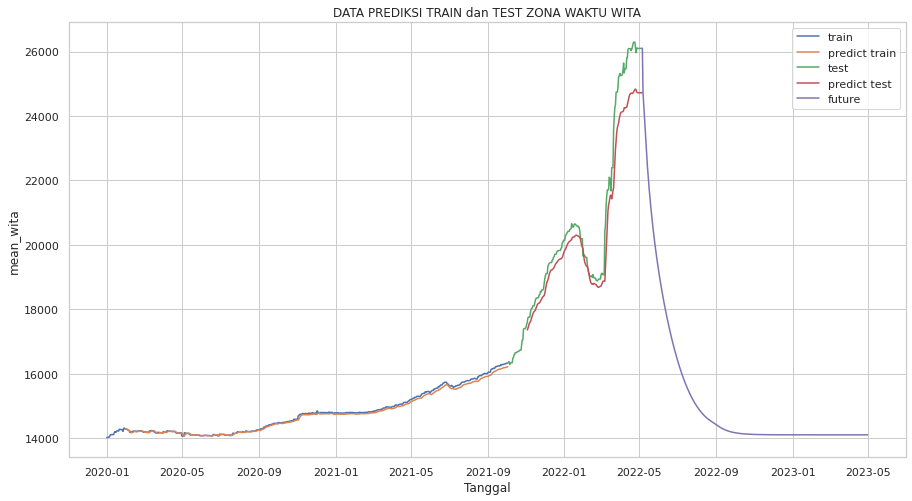

In [ ]:
train_wita['predict'] = np.nan
train_wita['predict'][-len(predict_train_wita):] = predict_train_wita[:,0]
test_wita['predict'] = np.nan
test_wita['predict'][-len(predict_test_wita):] = predict_test_wita[:,0]

y_test_wita = scaler_wita.transform(test_wita[['mean_wita']])
n_future_wita = 12*30
future_wita = [[y_test_wita[-1,0]]]
X_new_wita= y_test_wita[-window_size:,0].tolist()

for i in range(n_future_wita):
    y_future_wita = best_model_wita.predict(np.array([X_new_wita]).reshape(1,window_size,1))
    future_wita.append([y_future_wita[0,0]])
    X_new_wita = X_new_wita[1:]
    X_new_wita.append(y_future_wita[0,0])

future_wita = scaler_wita.inverse_transform(np.array(future_wita))
date_future_wita = pd.date_range(start=test_wita['Tanggal'].values[-1], periods=n_future_wita+1, freq='D')

plt.figure(figsize=(15,8))
plt.title('DATA PREDIKSI TRAIN dan TEST ZONA WAKTU WITA')
sns.lineplot(data=train_wita, x='Tanggal', y='mean_wita', label = 'train')
sns.lineplot(data=train_wita, x='Tanggal', y='predict', label = 'predict train')
sns.lineplot(data=test_wita, x='Tanggal', y='mean_wita', label = 'test')
sns.lineplot(data=test_wita, x='Tanggal', y='predict', label = 'predict test')
sns.lineplot(x=date_future_wita, y=future_wita[:,0], label = 'future')

Plot Prediksi data test

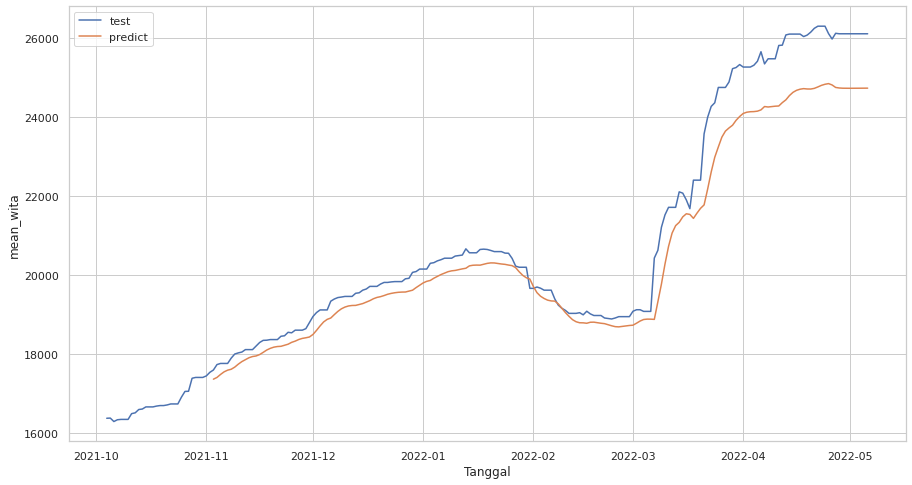

In [ ]:
test_wita['predict'] = np.nan
test_wita['predict'][-len(predict_test_wita):] = predict_test_wita[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=test_wita, x='Tanggal', y='mean_wita', label = 'test')
sns.lineplot(data=test_wita, x='Tanggal', y='predict', label = 'predict')

Plot Prediksi data sebulan terakhir

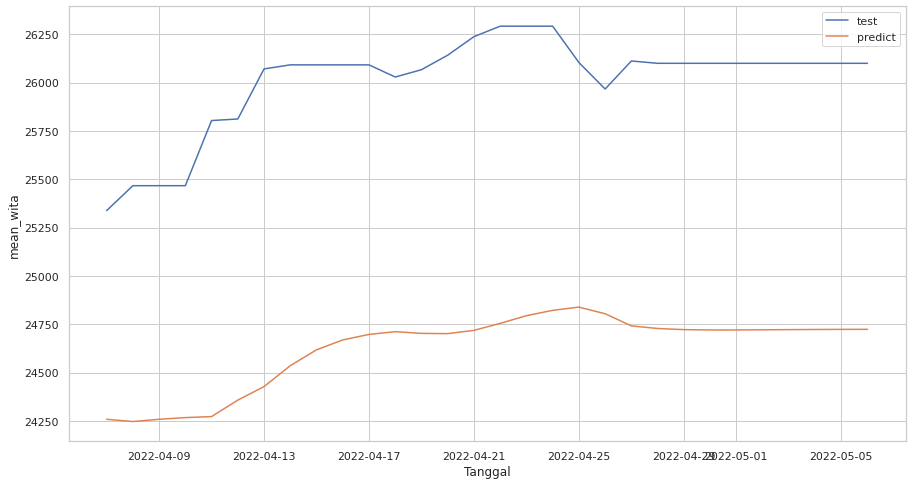

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=test_wita[-1*30:], x='Tanggal', y='mean_wita', label = 'test')
sns.lineplot(data=test_wita[-1*30:], x='Tanggal', y='predict', label = 'predict')

#### __4.5.5 Forecasting__

Text(0, 0.5, 'mean_wita')

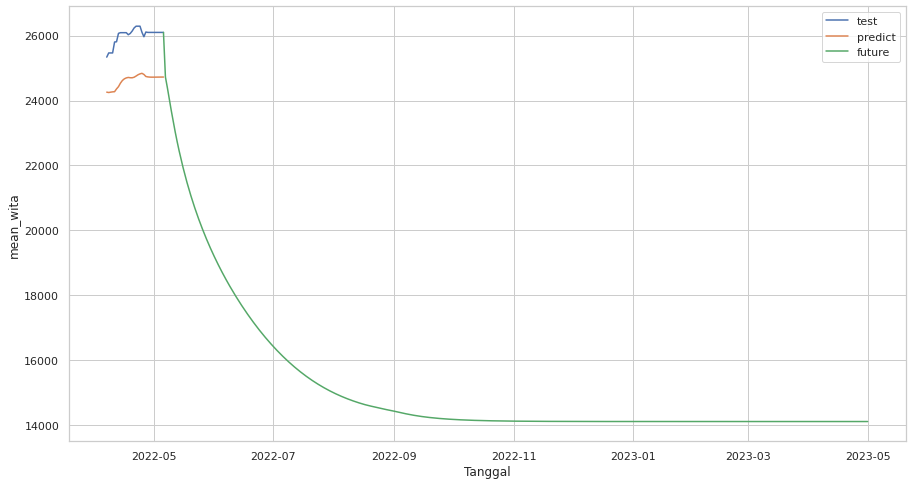

In [ ]:
# forecasting data selanjutnya
y_test_wita = scaler_wita.transform(test_wita[['mean_wita']])
n_future_wita = 12*30
future_wita = [[y_test_wita[-1,0]]]
X_new_wita = y_test_wita[-window_size:,0].tolist()

for i in range(n_future_wita):
    y_future_wita = best_model_wita.predict(np.array([X_new_wita]).reshape(1,window_size,1))
    future_wita.append([y_future_wita[0,0]])
    X_new_wita = X_new_wita[1:]
    X_new_wita.append(y_future_wita[0,0])

future_wita = scaler_wita.inverse_transform(np.array(future_wita))
date_future_wita = pd.date_range(start=test_wita['Tanggal'].values[-1], periods=n_future_wita+1, freq='D')

# Plot Data dua bulan terakhir dan dua bulan selanjutnya
plt.figure(figsize=(15,8))
sns.lineplot(data=test_wita[-1*30:], x='Tanggal', y='mean_wita', label = 'test') #[-1*30:] [-24*30:]
sns.lineplot(data=test_wita[-1*30:], x='Tanggal', y='predict', label = 'predict') #[-1*30:] [-24*30:]
sns.lineplot(x=date_future_wita, y=future_wita[:,0], label = 'future')
plt.ylabel('mean_wita')


### __4.6 Training model zona WITA__

#### __4.6.1 Membuat variabel GridSearchCV__

In [ ]:
grid_wit = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

#### __4.6.2 GridSearchCV Model__

In [ ]:
grid_result_wit = grid_wit.fit(X_train_wit, y_train_wit)

Epoch 1/100
35/35 [==============================] - 3s 27ms/step - loss: 0.0182 - mae: 0.0920 - val_loss: 0.0066 - val_mae: 0.0809
Epoch 2/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0075 - mae: 0.0520 - val_loss: 3.7071e-04 - val_mae: 0.0168
Epoch 3/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0065 - mae: 0.0473 - val_loss: 4.6717e-04 - val_mae: 0.0194
Epoch 4/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0062 - mae: 0.0444 - val_loss: 0.0036 - val_mae: 0.0595
Epoch 5/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0059 - mae: 0.0433 - val_loss: 3.0949e-04 - val_mae: 0.0162
Epoch 6/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0065 - mae: 0.0449 - val_loss: 1.4353e-04 - val_mae: 0.0101
Epoch 7/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0055 - mae: 0.0402 - val_loss: 9.7036e-05 - val_mae: 0.0070
Epoch 8/100
35/35 [==============================] - 0s 

#### __4.6.3 Hasil Parameter Terbaik__

In [ ]:
from tensorflow.keras.models import load_model
best_model_wit.save('my_model_wit')

INFO:tensorflow:Assets written to: my_model_wit/assets


INFO:tensorflow:Assets written to: my_model_wit/assets


In [ ]:
import shutil

shutil.make_archive('my_modelku_wit', 'zip', root_dir='/content/my_model_wit')


'/content/my_modelku_wit.zip'

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result_wit.best_score_, grid_result_wit.best_params_))
means_wit = grid_result_wit.cv_results_['mean_test_score']
stds_wit = grid_result_wit.cv_results_['std_test_score']
params_wit = grid_result_wit.cv_results_['params']
for mean, stdev, param in zip(means_wit, stds_wit, params_wit):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mengambil model terbaik
best_model_wit = grid_result_wit.best_estimator_.model

Best: -0.003587 using {'LSTM_unit': 32, 'dropout': 0.2}
-0.005161 (0.006065) with: {'LSTM_unit': 16, 'dropout': 0.1}
-0.004243 (0.005639) with: {'LSTM_unit': 16, 'dropout': 0.2}
-0.005980 (0.006776) with: {'LSTM_unit': 32, 'dropout': 0.1}
-0.003587 (0.005790) with: {'LSTM_unit': 32, 'dropout': 0.2}
-0.003779 (0.005796) with: {'LSTM_unit': 64, 'dropout': 0.1}
-0.003931 (0.006341) with: {'LSTM_unit': 64, 'dropout': 0.2}
-0.004578 (0.006440) with: {'LSTM_unit': 128, 'dropout': 0.1}
-0.003798 (0.006066) with: {'LSTM_unit': 128, 'dropout': 0.2}


#### __4.6.4 Evaluasi Model__

In [ ]:
# Prediksi data train
predict_train_wit = scaler_wit.inverse_transform(best_model_wit.predict(X_train_wit))
true_train_wit = scaler_wit.inverse_transform(y_train_wit)

# Prediksi data test
predict_test_wit = scaler_wit.inverse_transform(best_model_wit.predict(X_test_wit))
true_test_wit = scaler_wit.inverse_transform(y_test_wit)

Plot Prediksi data train

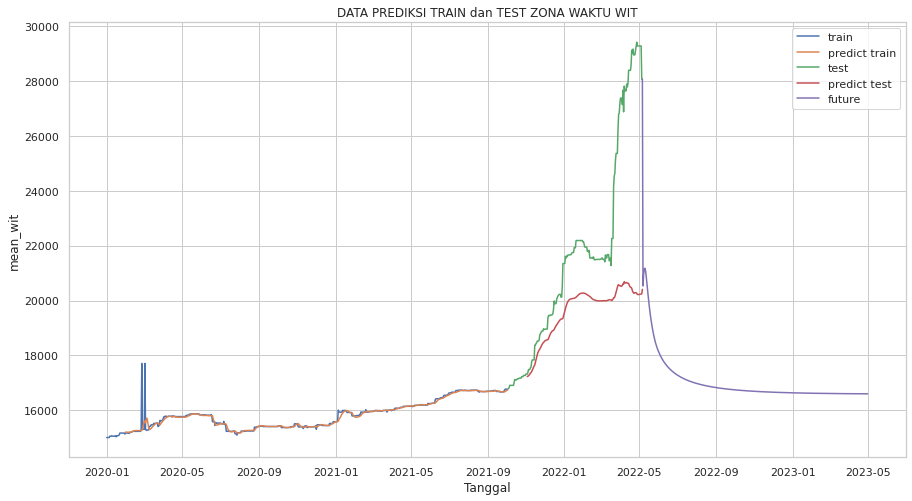

In [ ]:
train_wit['predict'] = np.nan
train_wit['predict'][-len(predict_train_wit):] = predict_train_wit[:,0]
test_wit['predict'] = np.nan
test_wit['predict'][-len(predict_test_wit):] = predict_test_wit[:,0]

y_test_wit = scaler_wit.transform(test_wit[['mean_wit']])
n_future_wit = 12*30
future_wit = [[y_test_wit[-1,0]]]
X_new_wit= y_test_wit[-window_size:,0].tolist()

for i in range(n_future_wit):
    y_future_wit = best_model_wit.predict(np.array([X_new_wit]).reshape(1,window_size,1))
    future_wit.append([y_future_wit[0,0]])
    X_new_wit = X_new_wit[1:]
    X_new_wit.append(y_future_wit[0,0])

future_wit = scaler_wit.inverse_transform(np.array(future_wit))
date_future_wit = pd.date_range(start=test_wit['Tanggal'].values[-1], periods=n_future_wit+1, freq='D')

plt.figure(figsize=(15,8))
plt.title('DATA PREDIKSI TRAIN dan TEST ZONA WAKTU WIT')
sns.lineplot(data=train_wit, x='Tanggal', y='mean_wit', label = 'train')
sns.lineplot(data=train_wit, x='Tanggal', y='predict', label = 'predict train')
sns.lineplot(data=test_wit, x='Tanggal', y='mean_wit', label = 'test')
sns.lineplot(data=test_wit, x='Tanggal', y='predict', label = 'predict test')
sns.lineplot(x=date_future_wit, y=future_wit[:,0], label = 'future')

Plot Prediksi data test

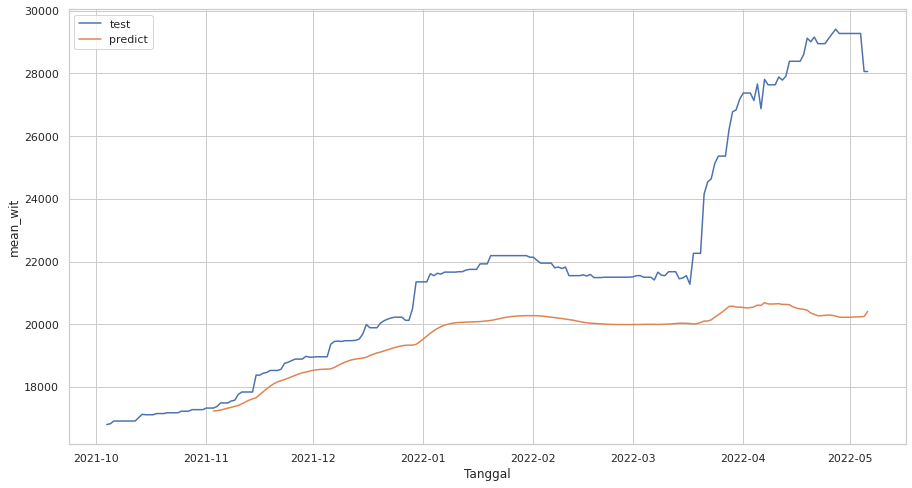

In [ ]:
test_wit['predict'] = np.nan
test_wit['predict'][-len(predict_test_wit):] = predict_test_wit[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=test_wit, x='Tanggal', y='mean_wit', label = 'test')
sns.lineplot(data=test_wit, x='Tanggal', y='predict', label = 'predict')

Plot data sebulan terakhir

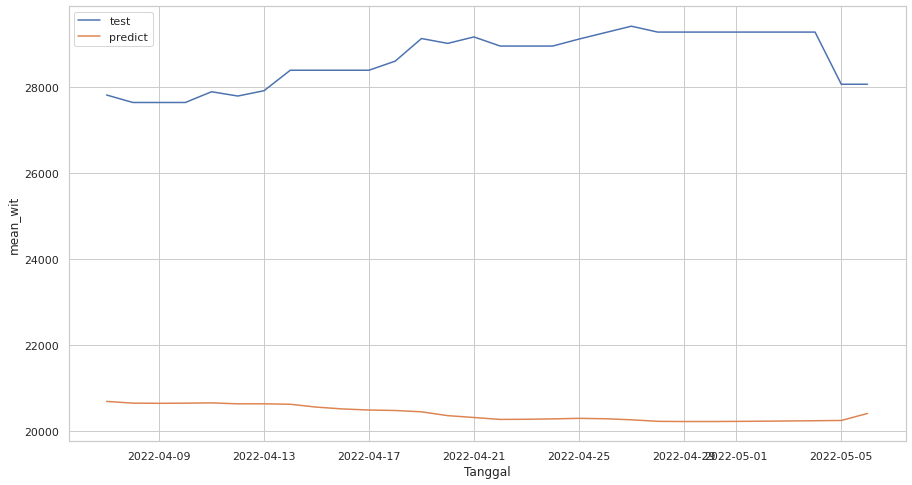

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=test_wit[-1*30:], x='Tanggal', y='mean_wit', label = 'test')
sns.lineplot(data=test_wit[-1*30:], x='Tanggal', y='predict', label = 'predict')

#### __4.6.5 Forecasting__

Text(0, 0.5, 'mean_wita')

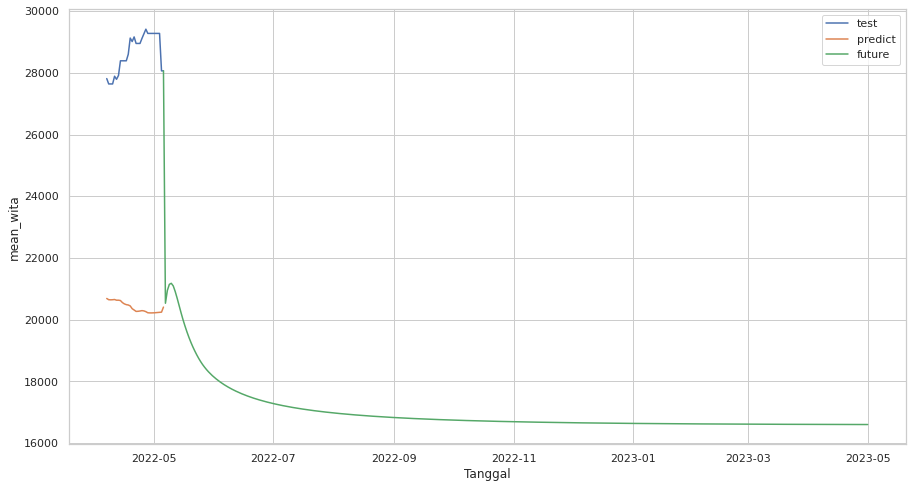

In [ ]:
# forecasting data selanjutnya
y_test_wit = scaler_wit.transform(test_wit[['mean_wit']])
n_future_wit = 12*30
future_wit = [[y_test_wit[-1,0]]]
X_new_wit = y_test_wit[-window_size:,0].tolist()

for i in range(n_future_wit):
    y_future_wit = best_model_wit.predict(np.array([X_new_wit]).reshape(1,window_size,1))
    future_wit.append([y_future_wit[0,0]])
    X_new_wit = X_new_wit[1:]
    X_new_wit.append(y_future_wit[0,0])

future_wit = scaler_wit.inverse_transform(np.array(future_wit))
date_future_wit = pd.date_range(start=test_wit['Tanggal'].values[-1], periods=n_future_wit+1, freq='D')

# Plot Data dua bulan terakhir dan dua bulan selanjutnya
plt.figure(figsize=(15,8))
sns.lineplot(data=test_wit[-1*30:], x='Tanggal', y='mean_wit', label = 'test') #[-1*30:] [-24*30:]
sns.lineplot(data=test_wit[-1*30:], x='Tanggal', y='predict', label = 'predict') #[-1*30:] [-24*30:]
sns.lineplot(x=date_future_wit, y=future_wit[:,0], label = 'future')
plt.ylabel('mean_wita')
